# Imports

In [159]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML
import seaborn as sns
import optuna

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper Functions

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def report_classification(y_true, y_pred, model):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {'Model': model, 'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'f1-Score': f1 }



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [161]:
# Dados de Treinamento
X_train = pd.read_csv('../../data/Classificacao/X_training.csv')
y_train = pd.read_csv('../../data/Classificacao/y_training.csv').values.ravel()

# Dados de Test
X_test = pd.read_csv('../../data/Classificacao/X_test.csv')
y_test = pd.read_csv('../../data/Classificacao/y_test.csv').values.ravel()

# Dados de Validacao
X_val = pd.read_csv('../../data/Classificacao/X_validation.csv')
y_val = pd.read_csv('../../data/Classificacao/y_validation.csv').values.ravel()

In [162]:
# X_train = X_train.drop(columns=['id'])
# X_test = X_test.drop(columns=['id'])
# X_val = X_val.drop(columns=['id'])

In [163]:
X_train.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,1.0,0.25,0.6,0.6,0.6,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,0.8,0.50,0.6,0.4,0.8,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,0.6,1.00,1.0,0.4,0.4,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,1.0,0.00,0.4,0.4,0.6,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,0.2,0.50,0.6,1.0,0.6,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


# Machine Learning Models

## KNN

In [164]:
# neigh = np.arange(1,10,1)
# results = []
# knn_results = pd.DataFrame()
# for k in range(1,10,2):
# #         # Model Definition
#     knn = KNeighborsClassifier(n_neighbors=k, n_jobs= -1)
        
#     # Model Train
#     #knn.fit(X_train, y_train)
#     knn.fit(np.array(X_train), np.array(y_train))

#     #knn.fit(X_train, y_train)
#     y_pred = knn.predict(np.array(X_val))
#     report = report_classification(y_val, y_pred)

    
    
#     results.append({
#              'n_neighbors': k,
#              'Accuracy': report['Accuracy'],
#              'Precision': report['Precision'],
#              'Recall': report['Recall'],
#              'f1-Score': report['f1-Score'],
#              'Dataset': 'Val'
#          })
    
#     df_aux = pd.DataFrame(results)
#     knn_results = pd.concat([knn_results, df_aux], axis=0).drop_duplicates()



In [165]:
# for k in range(1,10,2):
# # #         # Model Definition
#     knn = KNeighborsClassifier(n_neighbors=k, n_jobs= -1)
        
# #     # Model Train
#     knn.fit(X_train, y_train)

# #     #knn.fit(X_train, y_train)
#     y_pred = knn.predict(np.array(X_val))
#     report = report_classification(y_val, y_pred, 'KNN')

In [166]:
# pd.DataFrame([report])
report

{'Model': 'KNN',
 'Accuracy': 0.6664950609736477,
 'Precision': 0.6242395132885047,
 'Recall': 0.5789590912465662,
 'f1-Score': 0.6007472747582913}

In [167]:
def knn_fine_tuning(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1,10)

    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs=-1 )
    knn_model.fit(np.array(X_train), np.array(y_train))

    y_pred = knn_model.predict(np.array(X_val))

    return precision_score(y_val, y_pred)

In [168]:
study = optuna.create_study(direction='maximize')
study.optimize(knn_fine_tuning, n_trials=20)

[I 2023-08-22 19:15:50,363] A new study created in memory with name: no-name-829c8779-38b7-4c18-a59e-94eda7bc9a9b


[I 2023-08-22 19:15:57,169] Trial 0 finished with value: 0.6696609988236553 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 0.6696609988236553.
[I 2023-08-22 19:16:04,187] Trial 1 finished with value: 0.6242395132885047 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 0.6696609988236553.
[I 2023-08-22 19:16:10,942] Trial 2 finished with value: 0.6262340301974448 and parameters: {'n_neighbors': 1}. Best is trial 0 with value: 0.6696609988236553.
[I 2023-08-22 19:16:17,535] Trial 3 finished with value: 0.6696609988236553 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 0.6696609988236553.
[I 2023-08-22 19:16:24,433] Trial 4 finished with value: 0.6470024899444551 and parameters: {'n_neighbors': 10}. Best is trial 0 with value: 0.6696609988236553.
[I 2023-08-22 19:16:31,251] Trial 5 finished with value: 0.631775410218524 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.6696609988236553.
[I 2023-08-22 19:16:38,276] Trial 6 fini

In [169]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.6696609988236553, 0.6242395132885047, 0.6262340301974448,
                    0.6696609988236553, 0.6470024899444551, 0.631775410218524,
                    0.631775410218524, 0.6278511404561825, 0.6227083169407507,
                    0.631775410218524, 0.6262340301974448, 0.6278511404561825,
                    0.6278511404561825, 0.6227083169407507, 0.6696609988236553,
                    0.6227083169407507, 0.6839209802450613, 0.6839209802450613,
                    0.6839209802450613, 0.6839209802450613]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.6696609988236553, 0.6696609988236553, 0.6696609988236553,
                    0.6696609988236553, 0.6696609988236553, 0.6696609988236553,
                    0.6696609988236553, 0.6696609988236553, 0.6696609988236553,
                    0.6696609988236553, 0.6696609988236553, 0.6696609988236553,
                    0.6696609988236553, 0.6696609988236553, 0.6696609988236553,
                    0.6696609988236553, 0.6839209802450613, 0.6839209802450613,
                    0.6839209802450613, 0.6839209802450613]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

In [170]:
knn_best_params = study.best_params
knn_best_params

{'n_neighbors': 2}

In [ ]:
# dataset_types = np.unique(df_all_knn['Dataset'])
# cont = 0
# for i in dataset_types:
#     cont += 1
#     subset = df_all_knn.loc[df_all_knn['Dataset'] == i]
    
#     plt.subplot(1,3, cont)
#     plt.plot(subset['n_neighbors'],subset['Accuracy'], label='Acurácia')
#     plt.plot(subset['n_neighbors'],subset['Precision'], label='Precisão')
#     plt.plot(subset['n_neighbors'],subset['Recall'], label='Recall')
#     plt.plot(subset['n_neighbors'],subset['f1-Score'], label='F1-Score')
#     plt.title('Algoritmo KNN: Métricas no conjunto de dados de '+ i)
#     plt.legend()
#     #for indices, linha in df_all_knn.iterrows():



## Random Forest

In [171]:
def rf_fine_tuning(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 30)
    max_depth = trial.suggest_int('max_depth', 5, 30)

    rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)

    return f1_score(y_val, y_pred)

In [172]:
study = optuna.create_study(direction='maximize')
study.optimize(rf_fine_tuning, n_trials=100)

[I 2023-08-22 19:20:12,791] A new study created in memory with name: no-name-8a56adc6-6e9e-4a84-a3a6-21672fd6026f
[I 2023-08-22 19:20:18,558] Trial 0 finished with value: 0.9561476337836817 and parameters: {'n_estimators': 28, 'max_depth': 16}. Best is trial 0 with value: 0.9561476337836817.
[I 2023-08-22 19:20:22,859] Trial 1 finished with value: 0.9404918340529379 and parameters: {'n_estimators': 30, 'max_depth': 10}. Best is trial 0 with value: 0.9561476337836817.
[I 2023-08-22 19:20:26,522] Trial 2 finished with value: 0.9551722842219967 and parameters: {'n_estimators': 17, 'max_depth': 26}. Best is trial 0 with value: 0.9561476337836817.
[I 2023-08-22 19:20:29,617] Trial 3 finished with value: 0.9550561797752809 and parameters: {'n_estimators': 16, 'max_depth': 20}. Best is trial 0 with value: 0.9561476337836817.
[I 2023-08-22 19:20:33,869] Trial 4 finished with value: 0.9547402450943537 and parameters: {'n_estimators': 21, 'max_depth': 26}. Best is trial 0 with value: 0.956147633

In [173]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.9561476337836817, 0.9404918340529379, 0.9551722842219967,
                    0.9550561797752809, 0.9547402450943537, 0.9541401753131936,
                    0.9550392275196138, 0.8984711578786839, 0.9569511459589868,
                    0.949180512320444, 0.9565741403336974, 0.9564137308039747,
                    0.955383342111203, 0.9562238867768283, 0.956970610399397,
                    0.9527609440283059, 0.9564627899969871, 0.9417279136043197,
                    0.9570658524633419, 0.9541622760800843, 0.952237796399985,
                    0.956318546715411, 0.9568163849252663, 0.955757552898578,
                    0.9561093126552738, 0.9571051639653223, 0.9548105504759755,
                    0.9549685344990014, 0.9463781749764817, 0.9551552607778114,
                    0.9234389005079174, 0.956407068309408, 0.9572939007412423,
                    0.9561713984486783, 0.9552407505086279, 0.9503444641042053,
                    0.9553036864103627, 0.9555003388299074, 0.9513012692553953,
                    0.9579914176014453, 0.9560298665057697, 0.9559989478826137,
                    0.9566657881856857, 0.9550451807228915, 0.9577316089136909,
                    0.9557889963724305, 0.9561509433962263, 0.9563018867924528,
                    0.955682118206163, 0.9577422389463781, 0.9551315888696177,
                    0.9561647962642162, 0.957764537295422, 0.9550968130791834,
                    0.9578408492057517, 0.95625, 0.9555722891566265,
                    0.9561479582217864, 0.9484033171976434, 0.9566529595955784,
                    0.9562068575308362, 0.9574548192771085, 0.9566889064797015,
                    0.9565053378098005, 0.9574844662022218, 0.9557028778062377,
                    0.955686909378412, 0.957611444532518, 0.9552971381107,
                    0.9568981742894788, 0.9505922926975559, 0.9572630228961564,
                    0.9565643616620164, 0.9568133855893879, 0.9553857158992508,
                    0.9568163849252663, 0.9577167815053277, 0.956479217603912,
                    0.9523559423769508, 0.9564824574612256, 0.9583852103376721,
                    0.956649688737974, 0.9571320754716981, 0.9569349121351535,
                    0.9573634651600753, 0.9581468807580943, 0.9575551782682513,
                    0.9558408312314122, 0.957374575631837, 0.9562956823148218,
                    0.9550510783200907, 0.9571256038647343, 0.9569652775153965,
                    0.9566363020402018, 0.9562789995850466, 0.9568168960965492,
                    0.9575333182742264, 0.957266893167233, 0.956292785676672,
                    0.9190536418421249]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.9561476337836817, 0.9561476337836817, 0.95614763

In [174]:
rf_best_params = study.best_params
rf_best_params

{'n_estimators': 30, 'max_depth': 29}

## Decision Tree

In [176]:
results = []
dt_results = pd.DataFrame()
for i in range(1,50,2):
    dt_model = DecisionTreeClassifier(max_depth = i)

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_val)

    report = report_classification(y_val, y_pred, 'Decision Tree')

    results.append({
        'max_depth': i,
        'Accuracy': report['Accuracy'],
        'Precision': report['Precision'],
        'Recall': report['Recall'],
        'f1-Score': report['f1-Score'],
        'Dataset': 'Val'
    })

    df_aux = pd.DataFrame(results)
    dt_results = pd.concat([dt_results, df_aux], axis=0).drop_duplicates()

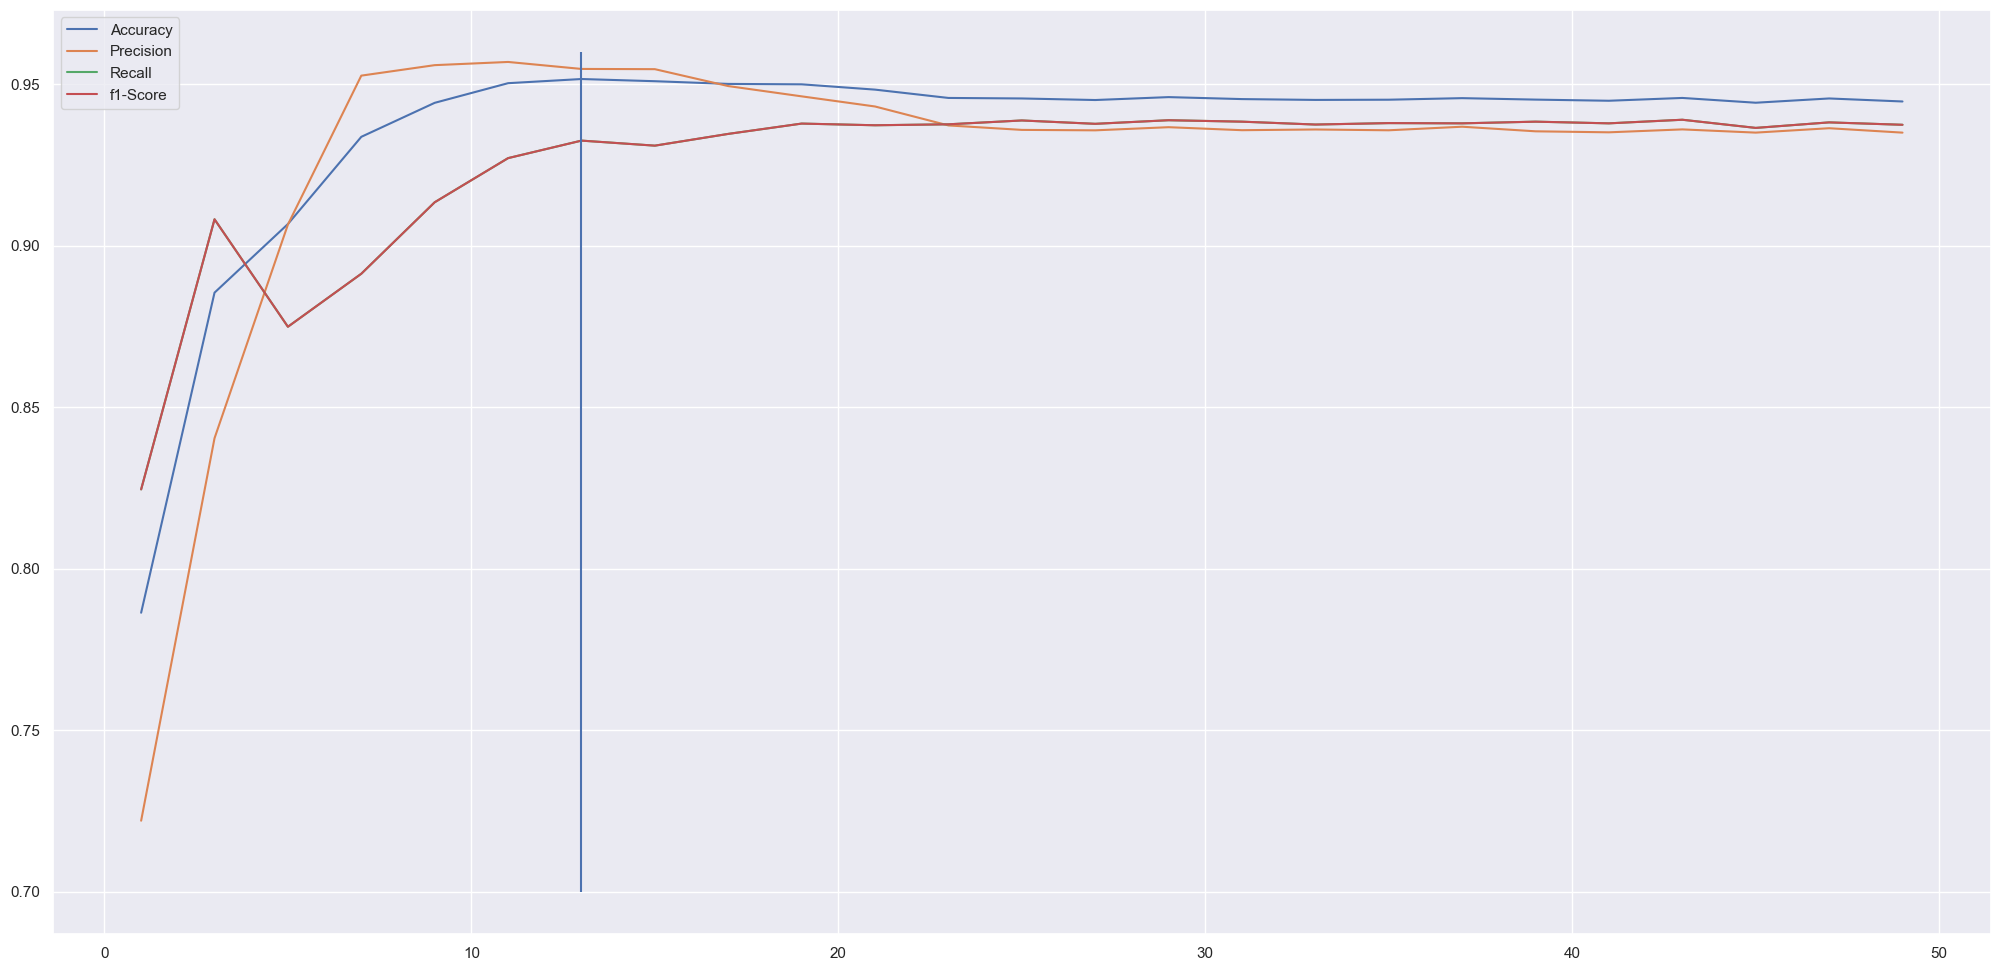

In [177]:
plt.plot(dt_results['max_depth'],dt_results['Accuracy'], label = 'Accuracy' )
plt.plot(dt_results['max_depth'],dt_results['Precision'], label = 'Precision' )
plt.plot(dt_results['max_depth'],dt_results['Recall'], label = 'Recall' )
plt.plot(dt_results['max_depth'],dt_results['Recall'], label = 'f1-Score' )
plt.legend()

best_max_depth = int(dt_results['max_depth'].loc[dt_results['f1-Score'] ==  dt_results['f1-Score'].max()])
plt.vlines(best_max_depth, ymin = 0.7, ymax=0.96)


## Logistic Regression

In [178]:
def lr_fine_tuning(trial):
    c = trial.suggest_int('C', 1, 3)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 10, 300)
    #max_depth = trial.suggest_int('max_depth', 5, 30)

    lr_model = LogisticRegression(C = c, solver=solver, max_iter= max_iter)

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_val)

    return f1_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(lr_fine_tuning, n_trials=50)

[I 2023-08-22 19:36:29,363] A new study created in memory with name: no-name-0123b215-d6f4-4227-8e0b-28aef53a3c10
[I 2023-08-22 19:36:29,630] Trial 0 finished with value: 0.0 and parameters: {'C': 1, 'solver': 'lbfgs', 'max_iter': 23}. Best is trial 0 with value: 0.0.
[I 2023-08-22 19:36:50,689] Trial 1 finished with value: 0.005914534969688009 and parameters: {'C': 2, 'solver': 'saga', 'max_iter': 255}. Best is trial 1 with value: 0.005914534969688009.
[I 2023-08-22 19:36:50,988] Trial 2 finished with value: 0.8526439305045611 and parameters: {'C': 3, 'solver': 'newton-cholesky', 'max_iter': 23}. Best is trial 2 with value: 0.8526439305045611.
[I 2023-08-22 19:36:52,733] Trial 3 finished with value: 0.001928211213289825 and parameters: {'C': 3, 'solver': 'sag', 'max_iter': 23}. Best is trial 2 with value: 0.8526439305045611.
[I 2023-08-22 19:37:14,674] Trial 4 finished with value: 0.00650310375406444 and parameters: {'C': 2, 'solver': 'saga', 'max_iter': 278}. Best is trial 2 with val

In [194]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.0, 0.005914534969688009, 0.8526439305045611,
                    0.001928211213289825, 0.00650310375406444,
                    0.0031124944419742106, 0.007091150834687546,
                    0.7777159936053382, 0.8155759870200108, 0.8522765981605541,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8521574564723695, 0.0, 0.8526439305045611,
                    0.8522107813446397, 0.8522107813446397, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.007237279373753786, 0.0, 0.8155759870200108,
                    0.8137118606863247, 0.0, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.003998815165876777, 0.8526439305045611, 0.015129259694477084,
                    0.004293751850755108, 0.8526439305045611, 0.8155759870200108,
                    0.004588513913558318, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.005914534969688009, 0.8526439305045611, 0.8522331566994702,
                    0.0, 0.7777159936053382, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8522107813446397, 0.011630474788369526,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.0,
                    0.7777159936053382, 0.004736179974839044, 0.8526439305045611,
                    0.822580048121414, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.007091150834687546, 0.8526439305045611, 0.0,
                    0.8522331566994702, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.004588853526755976,
                    0.8526439305045611, 0.8526439305045611, 0.7777159936053382,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.009730207872622734,
                    0.8526439305045611, 0.8526439305045611, 0.0]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.0, 0.005914534969688009, 0.8526439305045611,
                    0.8526439305045611, 0.8526439305045611, 0.

In [195]:
lr_best_param = study.best_params
lr_best_param

{'C': 3, 'solver': 'newton-cholesky', 'max_iter': 23}

# All Results

In [196]:
knn_final = KNeighborsClassifier(n_neighbors = knn_best_params['n_neighbors'], n_jobs=-1 )
rf_final = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'])
dt_final = DecisionTreeClassifier(max_depth = best_max_depth)
lr_final = LogisticRegression(C = lr_best_param['C'], solver=lr_best_param['solver'], max_iter= lr_best_param['max_iter'])

In [197]:
knn_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)
dt_final.fit(X_train, y_train)
lr_final.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=23, solver='newton-cholesky')

In [198]:
model_list = [knn_final, rf_final, dt_final, lr_final]
model_names = ['KNN', 'Random Forest', 'Decision Tree', 'Logistic Regression']

# Nos dados de Treinamento
train_dataset = pd.DataFrame()
test_dataset = pd.DataFrame()
val_dataset = pd.DataFrame()

In [202]:
for model, model_name in zip(model_list, model_names):
    y_pred = model.predict(np.array(X_train))
    results = report_classification(y_train, y_pred, model_name)
    train_dataset = pd.concat([train_dataset, pd.DataFrame([results])])
train_dataset['Dataset'] = 'Train'
train_dataset

,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.840199,1.000000,0.631284,0.773972,Train
0,Random Forest,0.999766,0.999968,0.999491,0.999729,Train
0,Decision Tree,0.970847,0.977613,0.954595,0.965967,Train
0,Logistic Regression,0.876177,0.871660,0.837629,0.854306,Train
0,KNN,0.840199,1.000000,0.631284,0.773972,Train
0,Random Forest,0.999766,0.999968,0.999491,0.999729,Train
0,Decision Tree,0.970847,0.977613,0.954595,0.965967,Train
0,Logistic Regression,0.876177,0.871660,0.837629,0.854306,Train


In [203]:
# Nos dados de Validation
for model, model_name in zip(model_list, model_names):
    print(model_name)
    y_pred = model.predict(np.array(X_val))
    results = report_classification(y_val, y_pred, model_name)
    val_dataset = pd.concat([val_dataset, pd.DataFrame([results])])
val_dataset['Dataset'] = 'Validation'
val_dataset

KNN
Random Forest
Decision Tree
Logistic Regression


,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.661283,0.683921,0.406118,0.509619,Validation
0,Random Forest,0.962451,0.972282,0.940159,0.955951,Validation
0,Decision Tree,0.952315,0.956300,0.932586,0.944294,Validation
0,Logistic Regression,0.874739,0.869730,0.836216,0.852644,Validation
0,KNN,0.661283,0.683921,0.406118,0.509619,Validation
0,Random Forest,0.962451,0.972282,0.940159,0.955951,Validation
0,Decision Tree,0.952315,0.956300,0.932586,0.944294,Validation
0,Logistic Regression,0.874739,0.869730,0.836216,0.852644,Validation


In [204]:
for model, model_name in zip(model_list, model_names):
    print(model_name)
    y_pred = model.predict(np.array(X_test))
    results = report_classification(y_test, y_pred, model_name)
    test_dataset = pd.concat([test_dataset, pd.DataFrame([results])])
test_dataset['Dataset'] = 'Test'
test_dataset

KNN
Random Forest
Decision Tree
Logistic Regression


,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.657900,0.689379,0.401496,0.507451,Test
0,Random Forest,0.962847,0.971449,0.943071,0.957050,Test
0,Decision Tree,0.951802,0.953718,0.935592,0.944568,Test
0,Logistic Regression,0.871626,0.867942,0.834492,0.850888,Test
0,KNN,0.657900,0.689379,0.401496,0.507451,Test
0,Random Forest,0.962847,0.971449,0.943071,0.957050,Test
0,Decision Tree,0.951802,0.953718,0.935592,0.944568,Test
0,Logistic Regression,0.871626,0.867942,0.834492,0.850888,Test


# Join Results

In [205]:
full_results = pd.concat([train_dataset, val_dataset, test_dataset])
full_results

,Model,Accuracy,Precision,Recall,f1-Score,Dataset
0,KNN,0.840199,1.000000,0.631284,0.773972,Train
0,Random Forest,0.999766,0.999968,0.999491,0.999729,Train
0,Decision Tree,0.970847,0.977613,0.954595,0.965967,Train
0,Logistic Regression,0.876177,0.871660,0.837629,0.854306,Train
0,KNN,0.840199,1.000000,0.631284,0.773972,Train
0,Random Forest,0.999766,0.999968,0.999491,0.999729,Train
0,Decision Tree,0.970847,0.977613,0.954595,0.965967,Train
0,Logistic Regression,0.876177,0.871660,0.837629,0.854306,Train
0,KNN,0.661283,0.683921,0.406118,0.509619,Validation
0,Random Forest,0.962451,0.972282,0.940159,0.955951,Validation


# Comparing Performance

In [212]:
list_datasets = np.unique(full_results['Dataset'])
for i in list_datasets:
    subset = full_results.loc[full_results['Dataset'] == i]
    
    

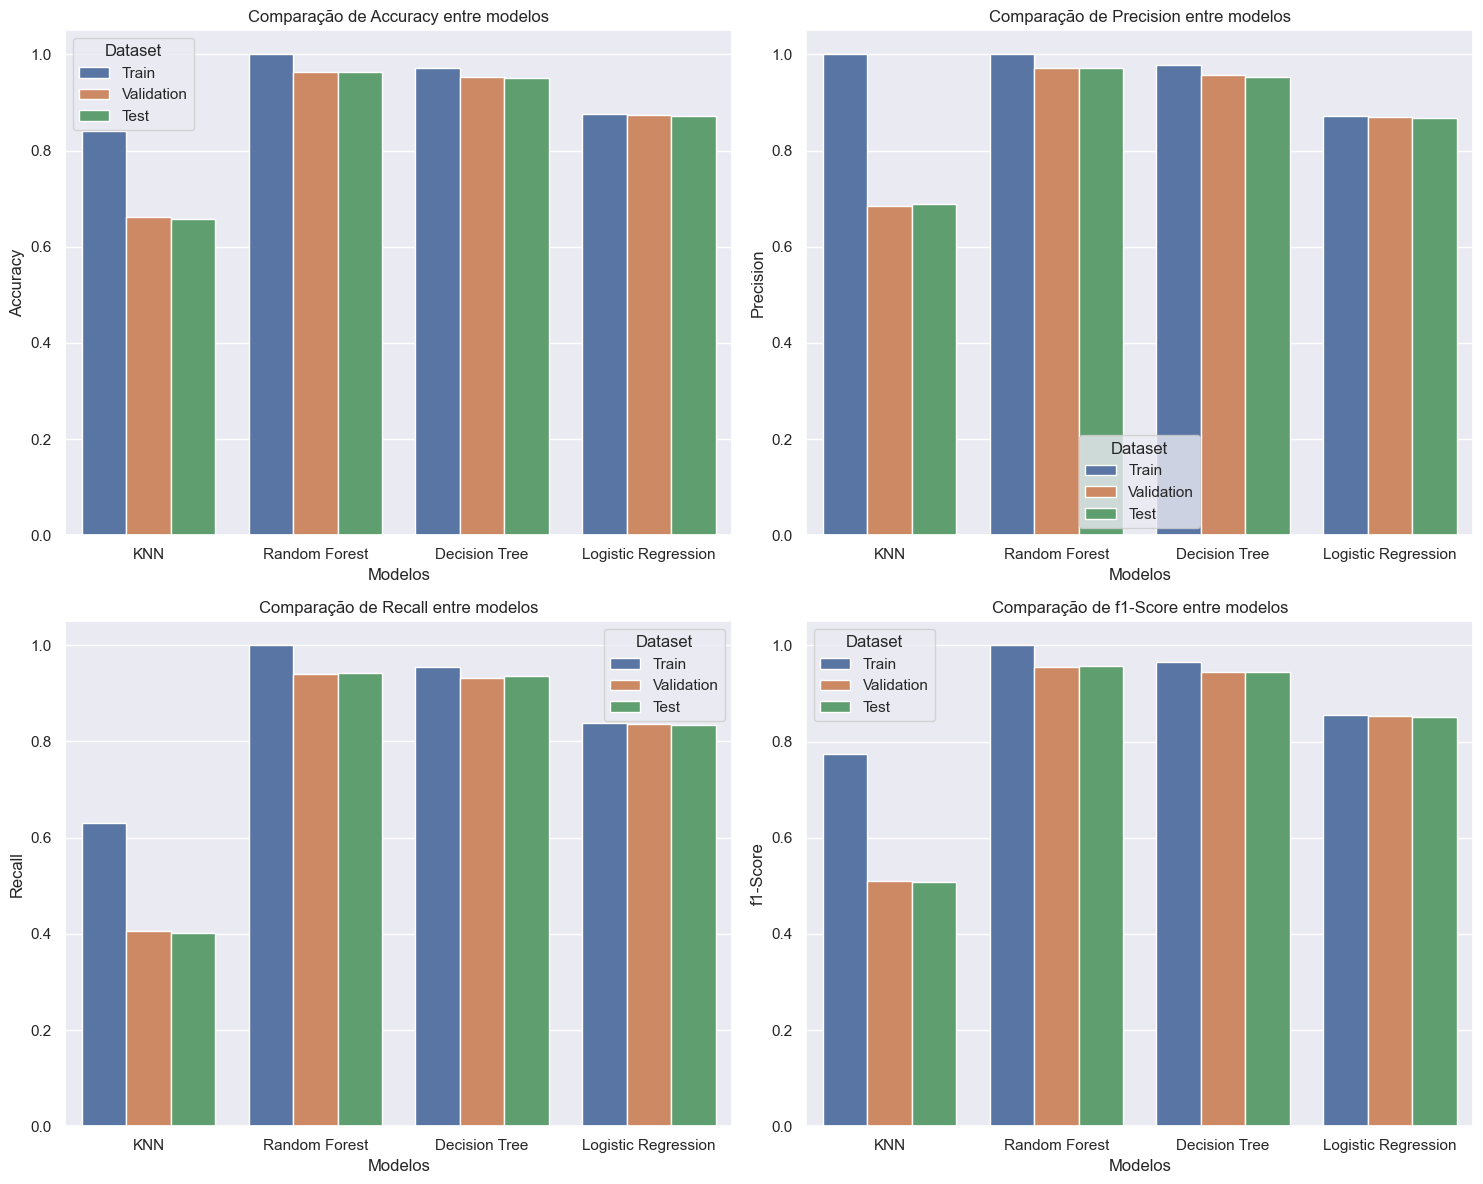

In [217]:
# Criar subplots de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

metrics = ["Accuracy", "Precision", "Recall", "f1-Score"]
for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(x="Model", y=metric, hue="Dataset", data=full_results, ax=ax)
    ax.set_title(f'Comparação de {metric} entre modelos')
    ax.set_ylabel(metric)
    ax.set_xlabel("Modelos")

plt.tight_layout()
plt.show()